<a href="https://colab.research.google.com/github/tiagoflorin/DataScience1/blob/Clase_9/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introducción a Feature Engineering

Imaginemos que tenemos que preparar una comida gourmet. No importa si tenemos el mejor horno del mundo (el modelo de Machine Learning), si nuestros ingredientes (los datos) están en mal estado o no están bien preparados, el resultado será un desastre.

La **Ingeniería de Características** es el proceso de ser un "chef de datos": seleccionamos, limpiamos, combinamos y transformamos los ingredientes crudos (los datos originales) para crear un platos muy ricos (un conjunto de características de alta calidad) que nuestro cliente (el modelo) pueda "disfrutar" y entender mejor.

En resumen, el objetivo es resaltar la información más importante de nuestros datos para que el modelo pueda encontrar patrones más fácilmente. Un buen Feature Engineering puede ser la diferencia entre un modelo poco util y uno extraordinariamente preciso.

In [ ]:
# Importar librerías fundamentales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones para una mejor visualización
%matplotlib inline
sns.set_style('whitegrid')

## Cargar nuestro dataset

In [ ]:
# Cargar el dataset del Titanic
df = sns.load_dataset('titanic')

df.drop(columns=['class', 'who', 'alive'], axis=1, inplace=True)

# 1. Ver las primeras 5 filas para darnos una idea de los datos
print("Primeras 5 filas del dataset:")
display(df.head())

# 2. Obtener un resumen técnico de los datos
print("\nInformación general del DataFrame:")
df.info()

# 3. Obtener un resumen estadístico de las columnas numéricas
print("\nDescripción estadística:")
display(df.describe())


Primeras 5 filas del dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,True,NaN,Southampton,True



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   adult_male   891 non-null    bool    
 9   deck         203 non-null    category
 10  embark_town  889 non-null    object  
 11  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.7+ KB

Descripción estadística:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


df.info(): Este es un resumen crucial. Nos dice:

* Cuántas filas y columnas hay (891 entradas, 15 columnas).

* El nombre de cada columna.

* Cuántos valores no nulos tiene cada columna (Aca ya podemos espiar datos faltantes. Por ejemplo, Age, Deck y Embark_town tienen menos de 891 entradas).

* El tipo de dato de cada columna (int64, float64, object, category).

## Tratamiento de datos faltantes

Cantidad de valores nulos por columna:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64


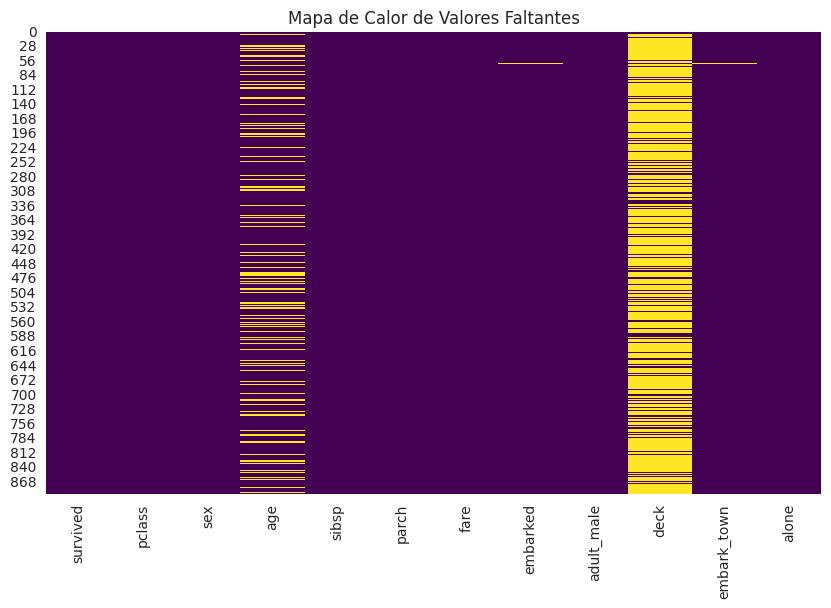

In [ ]:
# Contar la cantidad de valores nulos por columna
print("Cantidad de valores nulos por columna:")
print(df.isnull().sum())

# También podemos visualizarlo para tener un impacto más rápido
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Faltantes')
plt.show()

Ahora que sabemos exactamente cuál es el problema, el siguiente paso es solucionarlo. Hay varias estrategias para "rellenar" estos huecos, lo que se conoce como imputación.

### Técnicas Básicas de Imputación
Imputar es simplemente rellenar los valores NaN con un valor estimado. Las tres técnicas más sencillas y comunes son usar la media, la mediana o la moda de la columna.

¿Cuándo usar cada una?

1. Media: Es el promedio simple. Es una buena opción cuando la distribución de los datos es simétrica (parecida a una campana de Gauss) y no tiene muchos valores atípicos (outliers).

2. Mediana: Es el valor que se encuentra justo en el medio de todos los datos si los ordenamos. Es la mejor opción cuando la distribución es asimétrica o cuando hay outliers, ya que no se ve afectada por valores extremos.

3. Moda: Es el valor que más se repite. Es la única opción de las tres para variables categóricas (texto), como por ejemplo, la ciudad de embarque.

In [ ]:
# 1. Rellenar 'age' con la mediana
# La mediana es más robusta a outliers que la media.
mediana_edad = df['age'].median()
df['age'].fillna(mediana_edad, inplace=True)
print(f"La mediana de la edad es: {mediana_edad:.2f}. Se usó para rellenar los valores faltantes en 'age'.")


# 2. Rellenar 'embark_town' con la moda
# La moda es el valor más frecuente, ideal para variables categóricas.
moda_embarque = df['embark_town'].mode()[0]
df['embark_town'].fillna(moda_embarque, inplace=True)
print(f"La moda de la ciudad de embarque es: '{moda_embarque}'. Se usó para rellenar los valores faltantes.")


# 3. Verificamos que ya no hay nulos en esas columnas
print("\nValores nulos después de la imputación:")
print(df[['age', 'embark_town']].isnull().sum())

La mediana de la edad es: 28.00. Se usó para rellenar los valores faltantes en 'age'.
La moda de la ciudad de embarque es: 'Southampton'. Se usó para rellenar los valores faltantes.

Valores nulos después de la imputación:
age            0
embark_town    0
dtype: int64


/tmp/ipython-input-2751165801.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(mediana_edad, inplace=True)
/tmp/ipython-input-2751165801.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

### Eliminación de Filas o Columnas

A veces, la mejor solución para los datos faltantes no es rellenarlos, sino eliminarlos.

**¿Cuándo eliminar?**

**Eliminar una columna completa:** Se recomienda cuando la columna tiene una cantidad masiva de datos faltantes. Rellenar un 70-80% de una columna con un valor estimado (como la media o la moda) probablemente introduciría más ruido que información útil y podría sesgar fuertemente el modelo. Este es el caso de nuestra columna deck.

**Eliminar una fila:** Se puede hacer cuando solo unas pocas filas tienen datos faltantes y tenemos un dataset muy grande. Perder unas cuantas filas no afectará significativamente el rendimiento del modelo.

En nuestro caso, vamos a eliminar la columna `deck` por tener demasiados valores nulos. También eliminaremos `embarked`, ya que es redundante (tenemos `embark_town`).

In [ ]:
# La columna 'deck' tiene demasiados valores nulos (más del 75%).
# Imputarla sería muy arriesgado, así que la eliminamos.
df.drop('deck', axis=1, inplace=True)

# La columna 'embarked' contiene la misma información que 'embark_town' pero abreviada.
# La eliminamos para evitar redundancia.
df.drop('embarked', axis=1, inplace=True)

print("Columnas 'deck' y 'embarked' eliminadas.")
print("\nValores nulos restantes en el dataset:")
print(df.isnull().sum())


Columnas 'deck' y 'embarked' eliminadas.

Valores nulos restantes en el dataset:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
adult_male     0
embark_town    0
alone          0
dtype: int64


## 3. Codificación de Variables Categóricas

Como mencionamos, los modelos de machine learning son básicamente calculadoras muy potentes: entienden números, no texto. No podemos simplemente pasarles la columna sex con los valores "male" y "female". Necesitamos "traducir" esas categorías a un formato numérico.

### Variables Nominales vs. Ordinales

1. **Variables Nominales:** Son categorías que no tienen un orden o jerarquía intrínseca. Los valores son solo etiquetas.
 * Ejemplos en nuestro dataset: La columna `sex` (ser "male" no es más ni menos que ser "female") o `embark_town` (embarcar en "Southampton" no tiene un rango mayor que en "Cherbourg").

2. **Variables Ordinales:** Son categorías que sí tienen un orden o una jerarquía lógica y clara.
 * Ejemplos (fuera de nuestro dataset): Tallas de ropa ("S", "M", "L", "XL"), niveles de satisfacción ("malo", "regular", "bueno") o nivel educativo ("primaria", "secundaria", "universidad"). En estos casos, "L" es claramente más que "S", y "bueno" es más que "malo".

Entender esta diferencia es fundamental. Si tratamos una variable nominal como si tuviera un orden, podríamos darle al modelo una señal equivocada. Por ejemplo, si codificamos "Southampton"=1, "Cherbourg"=2, el modelo podría pensar que Cherbourg es "el doble" de importante que Southampton, ¡lo cual no tiene sentido!

## One-Hot Encoding para Variables Nominales

Para evitar crear un orden falso entre categorías (como `male` vs. `female`), usamos una técnica llamada One-Hot Encoding.

¿Cómo funciona?

En lugar de tener una sola columna (`sex`), crea nuevas columnas, una por cada categoría posible. Luego, usa 1 o 0 para indicar a qué categoría pertenece cada fila.

* Si un pasajero es male, la nueva columna `sex_male` tendrá un 1 y `sex_female` un 0.

* Si es female, será al revés.

In [ ]:
# Aplicar One-Hot Encoding a las columnas 'sex' y 'embark_town'
df = pd.get_dummies(df, columns=['sex', 'embark_town'], drop_first=True)

# Veamos cómo quedaron las primeras filas con las nuevas columnas
print("DataFrame después de One-Hot Encoding:")
display(df.head())


DataFrame después de One-Hot Encoding:


,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,True,False,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,False,True,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,True
4,0,3,35.0,0,0,8.0500,True,True,True,False,True


**drop_first=True:** Este es un pequeño truco de optimización. Si tenemos una columna `sex_female`, no necesitamos también `sex_male`. Si `sex_female` es 0, ¡sabemos por descarte que el pasajero debe ser male! Esto evita tener información redundante (lo que se conoce como multicolinealidad) y mantiene nuestro dataset un poco más pequeño. Por eso, get_dummies elimina la primera categoría de cada variable (female y Cherbourg en este caso).

## 4. Creación de Nuevas Características (Feature Creation)


Aca es donde realmente aplicamos nuestra inteligencia y conocimiento del problema. En lugar de solo limpiar y transformar los datos existentes, vamos a crear columnas completamente nuevas a partir de la información que ya tenemos. A menudo, estas nuevas características pueden revelar patrones que el modelo no podría ver de otra manera.

### Crear características a partir de las existentes

Una de las técnicas más comunes es combinar dos o más columnas para crear una nueva que tenga más sentido. En el dataset del Titanic, tenemos las columnas `sibsp` (número de hermanos/cónyuges a bordo) y `parch` (número de padres/hijos a bordo).

Podríamos pensar que lo que realmente influye en la supervivencia no es cada una por separado, sino el **tamaño total de la familia**.

In [ ]:
# Crear una nueva característica: 'family_size'
# Sumamos el número de hermanos/cónyuges ('sibsp') y padres/hijos ('parch')
# y le sumamos 1 (para incluir a la propia persona).
df['family_size'] = df['sibsp'] + df['parch'] + 1

# También podemos crear una característica binaria 'is_alone'
df['is_alone'] = 0
df.loc[df['family_size'] > 1, 'is_alone'] = 1

# Veamos las nuevas columnas junto a las originales
print("Nuevas características 'family_size' y 'is_alone':")
display(df[['sibsp', 'parch', 'family_size', 'is_alone']].head())

Nuevas características 'family_size' y 'is_alone':


,sibsp,parch,family_size,is_alone
0,1,0,2,0
1,1,0,2,0
2,0,0,1,1
3,1,0,2,0
4,0,0,1,1


## 5. Discretización y Binning

A veces, tener una variable numérica continua como la `edad` puede ser demasiado detallado. Para un modelo, la diferencia entre tener 25 y 26 años puede no ser tan importante como la diferencia entre tener 10 (ser un niño) y 30 (ser un adulto).

El **Binning** o **discretización** es el proceso de tomar una variable numérica continua y agruparla en "contenedores" o "cajones" (bins), convirtiéndola en una variable categórica.

¿Por qué haríamos esto?

* **Captura relaciones no lineales**: El efecto de la edad en la supervivencia probablemente no es una línea recta. Agruparla puede ayudar al modelo a entender que ser "Niño" tiene un fuerte impacto positivo, mientras que ser "Adulto" tiene otro efecto distinto.

* **Reduce el ruido**: Ayuda a que el modelo no se distraiga con pequeñas variaciones sin importancia.

In [ ]:
# Crear 'bins' o categorías para la columna 'age'
# Definimos los puntos de corte para las edades
bins = [0, 12, 18, 60, 100] # Cortes en 0, 12, 18, 60, 100 años
labels = ['Niño', 'Adolescente', 'Adulto', 'Mayor'] # Nombres para cada grupo

# Usamos la función pd.cut para crear la nueva columna 'age_group'
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Veamos cómo quedaron los grupos
print("Nueva columna 'age_group' creada a partir de 'age':")
display(df[['age', 'age_group']].head())

print("\nConteo de personas en cada grupo de edad:")
df['age_group'].value_counts()

Nueva columna 'age_group' creada a partir de 'age':


,age,age_group
0,22.0,Adulto
1,38.0,Adulto
2,26.0,Adulto
3,35.0,Adulto
4,35.0,Adulto



Conteo de personas en cada grupo de edad:


,count
age_group,
Adulto,752
Niño,68
Adolescente,45
Mayor,26


## 6. Escalado de Características (Feature Scaling)

Imagina que tienes una característica como la `edad` (que va de 0 a 80) y otra como la `tarifa` (fare, que puede ir de 0 a más de 500). Para un algoritmo que se basa en distancias (como K-Nearest Neighbors o SVM), la tarifa parecerá mucho más importante que la edad simplemente porque sus números son más grandes. El algoritmo no sabe que una está en años y la otra en dólares; solo ve los valores.

El **escalado de características** resuelve este problema al poner todas las variables numéricas en una escala común. Esto asegura que cada característica contribuya de manera más equitativa al resultado del modelo.

¿Qué algoritmos son sensibles a la escala?

* Casi todos los que usan distancias (KNN, K-Means, SVM).

* Modelos que usan descenso de gradiente para optimizarse (Regresión Lineal/Logística, Redes Neuronales).

* Análisis de Componentes Principales (PCA).

### Estandarización (StandardScaler)

La `estandarización` es una técnica que transforma los datos para que tengan:

* Un promedio (media) de 0.

* Una desviación estándar de 1.

No comprime los valores entre un rango mínimo y máximo, sino que los centra alrededor de cero. Esto es muy efectivo y funciona bien para la mayoría de los algoritmos de Machine Learning.

En `scikit-learn`, la librería por excelencia para Machine Learning en Python, esto se hace con `StandardScaler`.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos las columnas numéricas que queremos escalar.
# No incluimos las columnas que son 0/1 (ya están en una escala similar)
# ni la variable objetivo ('survived').
columnas_a_escalar = ['age', 'fare', 'family_size']

# Creamos una instancia del escalador
scaler = StandardScaler()

# Ajustamos el escalador a nuestros datos y los transformamos
# .fit() aprende la media y desviación estándar de los datos
# .transform() aplica la transformación
df[columnas_a_escalar] = scaler.fit_transform(df[columnas_a_escalar])

# Veamos el resultado
print("Columnas después de la estandarización:")
df[columnas_a_escalar].describe()

Columnas después de la estandarización:


,age,fare,family_size
count,8.910000e+02,8.910000e+02,8.910000e+02
mean,2.272780e-16,3.987333e-18,-2.392400e-17
std,1.000562e+00,1.000562e+00,1.000562e+00
min,-2.224156e+00,-6.484217e-01,-5.609748e-01
25%,-5.657365e-01,-4.891482e-01,-5.609748e-01
50%,-1.046374e-01,-3.573909e-01,-5.609748e-01
75%,4.333115e-01,-2.424635e-02,5.915988e-02
max,3.891554e+00,9.667167e+00,5.640372e+00


## 7. Selección de Características (Feature Selection)


Después de todo el trabajo de crear características, puede parecer extraño que ahora queramos eliminar algunas. Pero la **selección de características** es un paso crucial para construir un modelo robusto y eficiente. La idea es simple: nos quedamos solo con las características que más aportan y descartamos las que son redundantes o inútiles.

¿Por qué es importante?

1. **Reduce el "Ruido":** Demasiadas características, especialmente si no son relevantes, pueden confundir al modelo. Este podría empezar a aprender de las casualidades de los datos (ruido) en lugar de los patrones reales (señal), lo que lleva a un peor rendimiento en datos nuevos. A esto se le llama sobreajuste (overfitting).

2. **Mejora la Eficiencia:** Menos columnas significa que el modelo necesita menos tiempo y memoria para entrenarse. ¡Esto es clave cuando se trabaja con datasets gigantescos!

3. **Facilita la Interpretación:** Un modelo con 10 características es mucho más fácil de entender y explicar que uno con 100.



### Métodos de Filtro: Mapa de Calor de Correlación

Un **"método de filtro"** es una técnica que aplicamos a los datos antes de entrenar un modelo para filtrar las características menos útiles. La forma más visual y común de hacerlo es con un mapa de calor de correlación.

Este mapa nos muestra un número entre -1 y 1 que indica cómo se relacionan dos variables:

* **+1 (Correlación Positiva Fuerte):** Cuando una variable sube, la otra también tiende a subir.

* **-1 (Correlación Negativa Fuerte):** Cuando una variable  baja, la otra tiende a bajar.

* **0 (Sin Correlación):** No hay una relación lineal aparente entre las dos variables.

Para la selección de características, nos fijamos en dos cosas:

* **Características muy correlacionadas entre sí:** Si dos características tienen una correlación muy alta (ej. > 0.8), son redundantes. Aportan casi la misma información, por lo que podemos eliminar una.

* **Características poco correlacionadas con la variable objetivo (survived):** Si una característica no tiene casi ninguna correlación con lo que queremos predecir, probablemente no sea muy útil.

In [ ]:
df.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,family_size,is_alone,age_group
0,0,3,-0.565736,1,0,-0.502445,True,False,True,False,True,0.059160,0,Adulto
1,1,1,0.663861,1,0,0.786845,False,False,False,False,False,0.059160,0,Adulto
2,1,3,-0.258337,0,0,-0.488854,False,True,False,False,True,-0.560975,1,Adulto
3,1,1,0.433312,1,0,0.420730,False,False,False,False,True,0.059160,0,Adulto
4,0,3,0.433312,0,0,-0.486337,True,True,True,False,True,-0.560975,1,Adulto


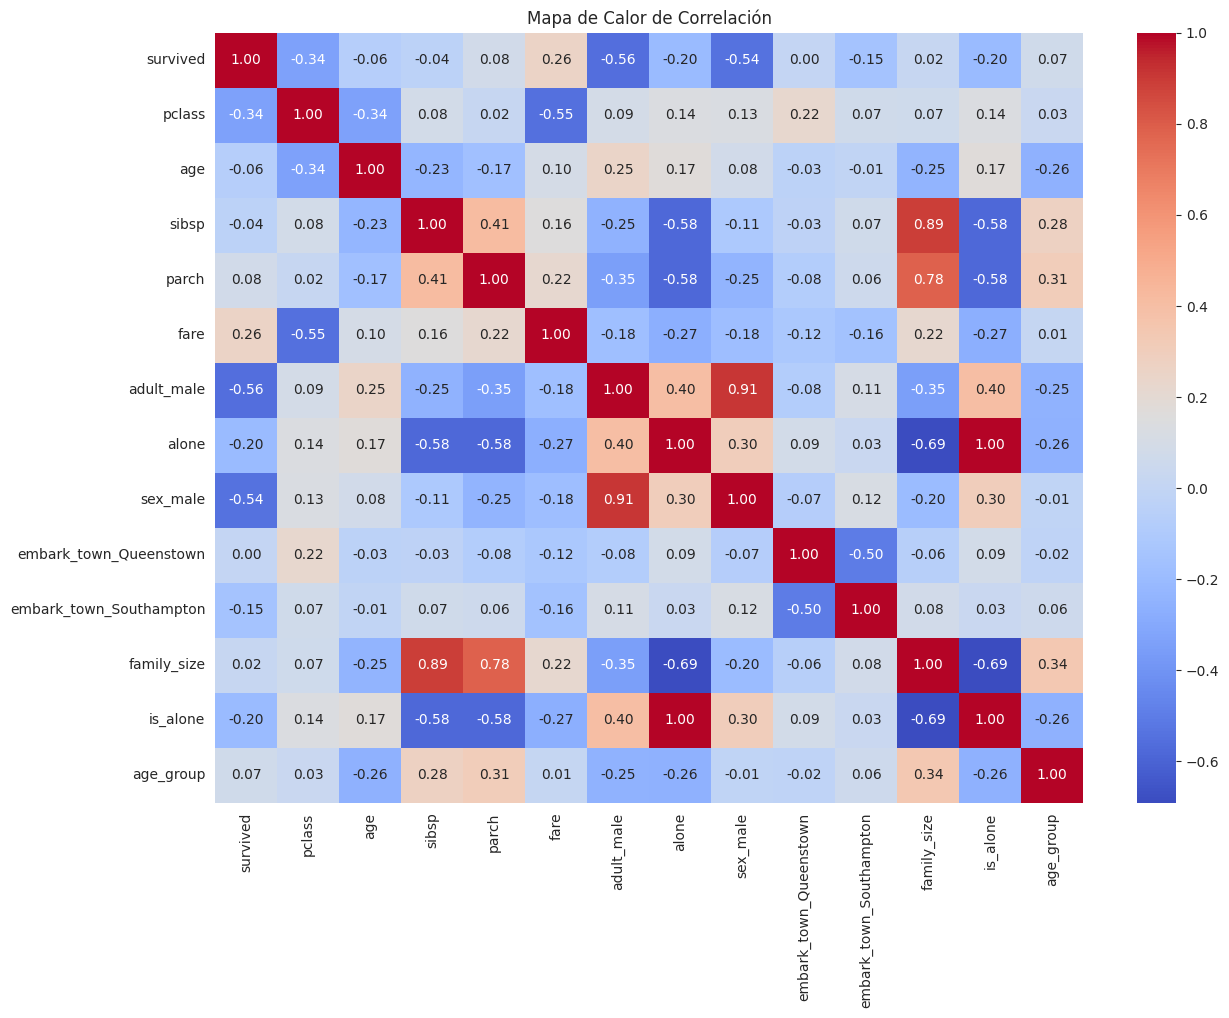

In [ ]:
# Primero, necesitamos convertir 'age_group' y  a números para incluirla en la correlación.
# Usaremos Label Encoding aquí, ya que hay un orden claro en los grupos de edad.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['age_group'] = le.fit_transform(df['age_group'])

# Calculamos la matriz de correlación
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()

# Creamos el mapa de calor con Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlación')
plt.show()

### Análisis del Mapa de Calor

* Observa la fila o columna de `survived` (nuestro objetivo). Características como `sex_male` tienen una correlación negativa fuerte (-0.54), lo que confirma que ser hombre estaba negativamente asociado con la supervivencia. `pclass` también tiene una correlación negativa (-0.34).

* Vemos correlaciones altas entre nuestras propias características, como `family_size` y `sibsp` (0.89) o `family_size` y `parch` (0.78). Esto es lógico, ya que creamos `family_size` a partir de ellas! En un caso real, podríamos decidir quedarnos solo con `family_size` y eliminar `sibsp` y `parch` para simplificar el modelo.

## Métodos Wrapper: Sequential Feature Selection (SFS)

A diferencia de los métodos de filtro (como la correlación) que seleccionan características basándose solo en sus propiedades estadísticas, los métodos wrapper utilizan un modelo de machine learning para "envolver" el proceso de selección.

El SFS funciona así:

1. Empieza con cero características.
2. Prueba a entrenar un modelo con cada característica por separado y se queda con la que da el mejor resultado.
3. Luego, prueba a añadir cada una de las características restantes a la que ya seleccionó, y de nuevo se queda con la combinación que mejor funciona.
4. Repite este proceso hasta alcanzar el número deseado de características.

Es un método mucho más "inteligente" porque elige las características que funcionan mejor **para el modelo específico que vas a usar**. Su desventaja es que es computacionalmente más costoso.



In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

# NOTA: Para este paso, tenemos eliminar las columnas que no son características del modelo
# y la variable objetivo ('survived'). También las originales que ya procesamos.
# También debemos asegurarnos de que no haya nulos en 'age_group_encoded'
df['age_group'].fillna(df['age_group'].mode()[0], inplace=True) # Rellenamos por si acaso
df_para_sfs = df.drop(columns=['survived', 'age_group', 'sibsp', 'parch'])

/tmp/ipython-input-3485045359.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_group'].fillna(df['age_group'].mode()[0], inplace=True) # Rellenamos por si acaso


In [ ]:
X = df_para_sfs
y = df['survived']

# Creamos el modelo que guiará la selección
lr = LogisticRegression(max_iter=1000)

In [ ]:
# Creamos el selector SFS
# 'forward' significa que va añadiendo características una a una.
# 'k_features' es el número de características que queremos al final.
# 'scoring' es la métrica para evaluar (usaremos la precisión).
# 'cv' es para validación cruzada.
sfs = SequentialFeatureSelector(lr,
                           n_features_to_select='auto', # O podemos poner un número, ej: 8
                           direction='forward',
                           scoring='accuracy',
                           cv=5)

In [ ]:
# Ajustamos el SFS a nuestros datos
sfs.fit(X, y)

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000),
                          scoring='accuracy')

In [ ]:
# Obtenemos los nombres de las características seleccionadas
selected_features = X.columns[sfs.get_support()]
print(f"Las características seleccionadas por SFS son: \n{list(selected_features)}")

Las características seleccionadas por SFS son: 
['pclass', 'age', 'adult_male', 'embark_town_Queenstown', 'family_size']


## 8. Automatización con Pipelines

Un **Pipeline** de scikit-learn es un objeto que encadena todos nuestros pasos de transformación y un modelo final. Es la forma correcta de trabajar porque:

* **Evita la fuga de datos (Data Leakage):** Asegura que cualquier cálculo (como la media para escalar) se haga solo con los datos de entrenamiento.

* **Simplifica el código:** En lugar de 10 pasos separados, tienes un solo objeto que lo hace todo.

* **Facilita la producción:** Puedes guardar este pipeline y aplicarlo directamente a datos nuevos con una sola línea de código.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
# Re-cargamos los datos para empezar de cero con el pipeline
# Esto es para demostrar que el pipeline hace todo desde el principio
data = sns.load_dataset('titanic')
data = data.drop(columns=['class', 'who', 'embark_town', 'alive'])

X = data.drop('survived', axis=1)
y = data['survived']

### 1. Creamos el preprocesador con ColumnTransformer

Definimos qué hacer con cada tipo de columna

In [ ]:
# Separar en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Pipeline para procesar las caracteristicas numericas
numeric_features = ['age', 'fare', 'sibsp', 'parch']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Rellena faltantes con la mediana
    ('scaler', StandardScaler()) # Escala los datos
])

In [ ]:
# Pipeline para procesar las características categóricas
categorical_features = ['embarked', 'sex', 'pclass', 'adult_male', 'alone']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Rellena faltantes con la moda
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Codifica a formato numérico
])

In [ ]:
# 4. Crear el preprocesador que une ambos transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop' # MUY IMPORTANTE: descarta las columnas que no mencionamos!!!!!!!!!!!!!!!
)

In [ ]:
# 5. Crear el Pipeline final
# Este pipeline primero procesará los datos con 'preprocessor' y luego entrenará el modelo
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [ ]:
# 6. Entrenar y evaluar el Pipeline
print("Entrenando el pipeline final...")
final_pipeline.fit(X_train, y_train)

Entrenando el pipeline final...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare', 'sibsp',
                                                   'parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['embarked', 'sex', 'pclass',
                                                   'adult_male', 'alone'])])),
                ('classifier', LogisticRegression())])

In [ ]:
print("Evaluando el modelo...")
accuracy = final_pipeline.score(X_test, y_test)

print("\n-------------------------------------------")
print(f"Precisión del Pipeline final: {accuracy:.4f}")
print("-------------------------------------------")

Evaluando el modelo...

-------------------------------------------
Precisión del Pipeline final: 0.8209
-------------------------------------------
